# Tarea rápida 1. Web Scraping con Beautifulsoup
## Introducción a la Ciencia de Datos
## Alumno: Arnoldo Fernando Chue Sánchez
## Profesor: Dr. Sergio Rogelio Tinoco Martínez

Importamos las bibliotecas que vamos a necesitar

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Vamos a trabajar con la página web: https://books.toscrape.com

Nótese que es una página web hecha para practicar web scraping

Lo primero que podemos notar es que es un catálogo de libros de 50 páginas. Por lo que para extraer la información que queremos debemos navegar por esas 50 páginas.

Afortunadamente, podemos encontrar un patrón muy simple en el URL de cada página del catálogo:
- https://books.toscrape.com/catalogue/page-1.html
- https://books.toscrape.com/catalogue/page-2.html
- https://books.toscrape.com/catalogue/page-3.html

Y así sucesivamente hasta: https://books.toscrape.com/catalogue/page-50.html

Por lo tanto, no es necesario navegar por el sitio, podemos almacenar los enlaces de las páginas web en una lista. Así podemos iterar por esos enlaces y realizar el web scraping en cada uno.

In [2]:
links = [f"https://books.toscrape.com/catalogue/page-{i}.html" for i in range(1, 51)]
links

['https://books.toscrape.com/catalogue/page-1.html',
 'https://books.toscrape.com/catalogue/page-2.html',
 'https://books.toscrape.com/catalogue/page-3.html',
 'https://books.toscrape.com/catalogue/page-4.html',
 'https://books.toscrape.com/catalogue/page-5.html',
 'https://books.toscrape.com/catalogue/page-6.html',
 'https://books.toscrape.com/catalogue/page-7.html',
 'https://books.toscrape.com/catalogue/page-8.html',
 'https://books.toscrape.com/catalogue/page-9.html',
 'https://books.toscrape.com/catalogue/page-10.html',
 'https://books.toscrape.com/catalogue/page-11.html',
 'https://books.toscrape.com/catalogue/page-12.html',
 'https://books.toscrape.com/catalogue/page-13.html',
 'https://books.toscrape.com/catalogue/page-14.html',
 'https://books.toscrape.com/catalogue/page-15.html',
 'https://books.toscrape.com/catalogue/page-16.html',
 'https://books.toscrape.com/catalogue/page-17.html',
 'https://books.toscrape.com/catalogue/page-18.html',
 'https://books.toscrape.com/catalogu

Como la página no cambia entre uno y otro, podemos agarrar cualquiera de ellos para inspeccionar el html para planear el web scraping

In [5]:
html = urlopen(links[0])
bs = BeautifulSoup(html.read(), 'html.parser')
print(bs.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:30" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="../static/oscar/css/styles.css" rel="stylesheet" typ

Analizando la información del html, parece que podemos obtener la etiqueta que contiene toda la información de cada libro. Así posteriormente podríamos extraer en automático la información que necesitamos de cada uno de estos "contenedores"

In [6]:
contenedores = bs.find_all("article", {"class":"product_pod"})

Si nuestra suposición es correcta deberíamos tener una lista de 20 elementos en la variable contenedores porque hay 20 libros en cada html

In [7]:
len(contenedores)

20

In [8]:
type(contenedores[0])

bs4.element.Tag

Ya con esto nos podemos enfocar primero en cómo se pueden obtener los títulos

In [13]:
contenedores[0].h3.a.attrs["title"]

'A Light in the Attic'

Observé que dentro de lo que estamos nombrando como contenedor hay una etiqueta de título h3. En ella hay varios elementos, pero hay una etiqueta de ancla a, donde podemos encontrar el título de varias maneras. Sin embargo, en la que se obtiene completo es dentro de la etiqueta a. Específicamente en su atributo title. Por lo tanto, con esto tenemos solucionada la parte de extraer el título.

*Nota:* voy a extraer todos los datos de una sóla extracción al final, es decir, primero quiero encontrar los patrones de extracción para el resto de los datos que queremos para nuestro dataframe.

Pasemos entonces a extraer los precios

In [14]:
contenedores[0].find("p", {"class":"price_color"}).get_text()

'£51.77'

Para el precio usamos este otro enfoque: dentro del contenedor hay una etiqueta p con la clase específica de CSS "price_color". Con esto podemos encontrar fácilmente el precio.

*Nota:* vamos a extraer el precio así en un inicio. Ya hasta que tengamos el dataframe eliminaremos el símbolo de la moneda y convertiremos este tipo de dato a flotante

Pasemos entonces a la información de la valoración del libro

In [23]:
contenedores[0].find("p")

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [24]:
contenedores[0].find("p").attrs

{'class': ['star-rating', 'Three']}

In [22]:
contenedores[0].find("p").attrs["class"][-1]

'Three'

En este caso observé que las estrellas están casi al inicio del html del contenedor. Por lo tanto, al buscar la primera etiqueta de párrafo podemos ver que tiene una clase para cada cantidad de estrellas posibles. Simplemente es cuestión de acceder a esa clase y a su último elemento, el cual es el número específico de estrellas.

Pasemos finalmente a la url de la imagen del libro

In [27]:
contenedores[0].div.a.img.attrs["src"]

'../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg'

In [30]:
contenedores[0].div.a.img.attrs["src"].replace("..", "http://books.toscrape.com")

'http://books.toscrape.com/media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg'

Como podemos ver al consultar el link del output de la celda anterior, nos redirige directamente a la imagen.

Por lo tanto, ya estamos listos para hacer la extracción completa:

In [31]:
titulos, precio, valoraciones, urlsImagenes = [], [], [], []

# Iteramos por toda la pagina
for link in links:
    # Obtenemos el DOM
    html = urlopen(link)
    bs = BeautifulSoup(html.read(), "html.parser")

    # Obtenemos todos los libros 
    libros = bs.find_all("article", {"class":"product_pod"})

    # Iteramos por cada libro
    for libro in libros:
        # Obtenemos el titulo
        titulos.append(libro.h3.a.attrs["title"])
        # Obtenemos el precio
        precio.append(libro.find("p", {"class":"price_color"}).get_text())
        # Obtenemos la valoracion
        valoraciones.append(libro.find("p").attrs["class"][-1])
        # Obtenemos la imagen
        urlsImagenes.append(libro.div.a.img.attrs["src"].replace("..", "http://books.toscrape.com"))


Hay que comprobar que tengamos la misma cantidad de elementos en cada lista de la información extraida

In [32]:
print(len(titulos))
print(len(precio))
print(len(valoraciones))
print(len(urlsImagenes))

1000
1000
1000
1000


Justo la información de los 1000 libros.

Hay que crear ahora el dataframe

In [33]:
df = pd.DataFrame(data={"Título":titulos, "Precio":precio, "Valoraciones":valoraciones, "URLs":urlsImagenes})

In [34]:
df.head()

,Título,Precio,Valoraciones,URLs
0,A Light in the Attic,£51.77,Three,http://books.toscrape.com/media/cache/2c/da/2c...
1,Tipping the Velvet,£53.74,One,http://books.toscrape.com/media/cache/26/0c/26...
2,Soumission,£50.10,One,http://books.toscrape.com/media/cache/3e/ef/3e...
3,Sharp Objects,£47.82,Four,http://books.toscrape.com/media/cache/32/51/32...
4,Sapiens: A Brief History of Humankind,£54.23,Five,http://books.toscrape.com/media/cache/be/a5/be...


Comprobamos que los URLs sí estén completos (porque en el output de la celda anterior no se ven)

In [37]:
df["URLs"][999]

'http://books.toscrape.com/media/cache/d7/0f/d70f7edd92705c45a82118c3ff6c299d.jpg'

Eliminamos los símbolos de la moneda en la que están los precios

In [38]:
df["Precio"] = df["Precio"].apply(lambda x: x.replace("£", ""))

In [39]:
df.head()

,Título,Precio,Valoraciones,URLs
0,A Light in the Attic,51.77,Three,http://books.toscrape.com/media/cache/2c/da/2c...
1,Tipping the Velvet,53.74,One,http://books.toscrape.com/media/cache/26/0c/26...
2,Soumission,50.10,One,http://books.toscrape.com/media/cache/3e/ef/3e...
3,Sharp Objects,47.82,Four,http://books.toscrape.com/media/cache/32/51/32...
4,Sapiens: A Brief History of Humankind,54.23,Five,http://books.toscrape.com/media/cache/be/a5/be...


Ordenamos el dataframe inplace de acuerdo a la columna Precio en orden descendente

In [40]:
df.sort_values("Precio", ascending=False, inplace=True)

In [41]:
df.head()

,Título,Precio,Valoraciones,URLs
648,The Perfect Play (Play by Play #1),59.99,Three,http://books.toscrape.com/media/cache/40/16/40...
617,Last One Home (New Beginnings #1),59.98,Three,http://books.toscrape.com/media/cache/e4/0a/e4...
860,Civilization and Its Discontents,59.95,Two,http://books.toscrape.com/media/cache/4d/a6/4d...
560,The Barefoot Contessa Cookbook,59.92,Five,http://books.toscrape.com/media/cache/dd/07/dd...
366,The Diary of a Young Girl,59.90,Three,http://books.toscrape.com/media/cache/83/d5/83...


Cambiemos el formato de las valoraciones

In [42]:
def formatoValoracion(valor):
    if valor == "One": return 1
    if valor == "Two": return 2
    if valor == "Three": return 3
    if valor == "Four": return 4
    if valor == "Five": return 5

In [43]:
df["Valoraciones"] = df["Valoraciones"].apply(formatoValoracion)

In [44]:
df.head()

,Título,Precio,Valoraciones,URLs
648,The Perfect Play (Play by Play #1),59.99,3,http://books.toscrape.com/media/cache/40/16/40...
617,Last One Home (New Beginnings #1),59.98,3,http://books.toscrape.com/media/cache/e4/0a/e4...
860,Civilization and Its Discontents,59.95,2,http://books.toscrape.com/media/cache/4d/a6/4d...
560,The Barefoot Contessa Cookbook,59.92,5,http://books.toscrape.com/media/cache/dd/07/dd...
366,The Diary of a Young Girl,59.90,3,http://books.toscrape.com/media/cache/83/d5/83...


Verificamos el tipo de dato que tenemos en cada columna

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 648 to 638
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Título        1000 non-null   object
 1   Precio        1000 non-null   object
 2   Valoraciones  1000 non-null   int64 
 3   URLs          1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.1+ KB


Convertimos al tipo de dato correcto:
- Título y URLs a string
- Precio a float64

In [46]:
df["Título"] = df["Título"].astype("string")
df["URLs"] = df["URLs"].astype("string")
df["Precio"] = df["Precio"].astype("float64")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 648 to 638
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Título        1000 non-null   string 
 1   Precio        1000 non-null   float64
 2   Valoraciones  1000 non-null   int64  
 3   URLs          1000 non-null   string 
dtypes: float64(1), int64(1), string(2)
memory usage: 39.1 KB


Ya que tenemos nuestro dataframe limpio y correcto podemos guardarlo.

In [48]:
df.to_csv("Información de libros - Web Scraping.csv", index=False)

Respondamos finalmente la pregunta: ¿Existe correlación entre los precios y las valoraciones de los libros?

Hagamos una gráfica para averiguarlo

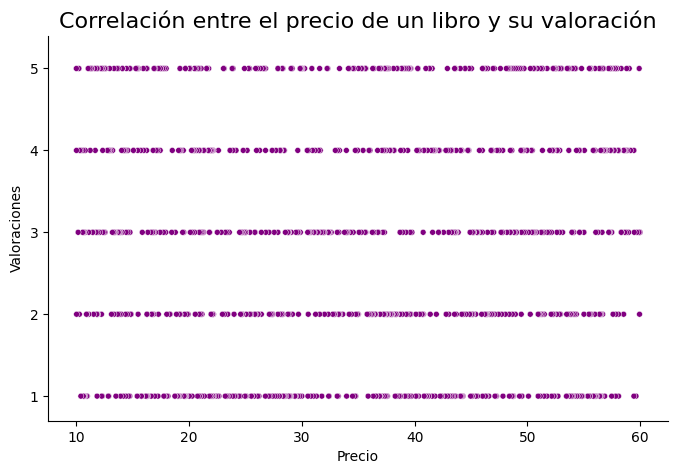

In [15]:
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(x=df["Precio"], y=df["Valoraciones"], color='purple', size=0.2, legend=None)
plt.title("Correlación entre el precio de un libro y su valoración", size=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(0.7, 5.4)
plt.show()

Con esta gráfica podemos ver claramente que en cada número de estrellas (por eso se forman las líneas horizontales) hay una distribución uniforme de los datos con respecto al precio. Además, entre estas distribuciones de cada número de estrellas no hay mucha diferencia.

Por lo tanto, podemos confirmar que no hay suficiente evidencia (al menos no a un nivel significativo) de que exista correlación entre el número de estrellas y la valoración de un libro.

Una posible explicación para esto es que nuestro sitio fue hecho para el web scraping. Por lo que los datos probablemente fueron generados aleatoriamente y por eso encontramos esta distribución uniforme.